<a href="https://colab.research.google.com/github/Trrunghau/AI/blob/main/modelMV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# khai báo các thư viện cần sử dụng
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Activation
from keras.optimizers import Adam
from keras.layers import LeakyReLU
from keras.models import load_model
from os import listdir
from numpy import asarray,save
from keras.utils import load_img, img_to_array

In [5]:
### thay doi ti le anh tu 0->255 thanh 0->1
train = ImageDataGenerator(rescale =1.0/255.0,rotation_range = 0.2,
                                   horizontal_flip = True,
                                   vertical_flip = True,
                                   zoom_range = 0.2)
test = ImageDataGenerator(rescale=1.0/255.0)

In [6]:
# lấy dữ liệu từ ggdrive
train_data = train.flow_from_directory('/content/drive/MyDrive/train2', target_size=(64,64),batch_size = 10, class_mode='categorical')
test_data = test.flow_from_directory('/content/drive/MyDrive/test2', target_size=(64,64), class_mode='categorical')

Found 14861 images belonging to 3 classes.
Found 301 images belonging to 3 classes.


In [7]:
# in ra những gì tìm được trong ggdrive
print('train_index :', train_data.class_indices)
print('test_index:', test_data.class_indices)

train_index : {'covid': 0, 'normal': 1, 'pneu': 2}
test_index: {'covid': 0, 'normal': 1, 'pneu': 2}


In [8]:
# cấu trúc CNN
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu',kernel_initializer='he_uniform', padding='same',  input_shape=(64, 64,3)))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3),kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3),kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, kernel_size=(3,3),kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Activation("relu"))
model.add(Dense(512))
model.add(Dropout(0.4))
model.add(Dense(3))
model.add(Activation("softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                    

In [9]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                    

In [10]:
# tiến hành dừng train nếu acccuracy giảm
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience = 10,restore_best_weights=True)
# tiến hành train model
history=model.fit(train_data,epochs=85,batch_size=32,verbose=1, 
                  validation_data=test_data,callbacks=[callback])

Epoch 1/85
1487/1487 [==============================] - 701s 470ms/step - loss: 0.6679 - accuracy: 0.7033 - val_loss: 0.6688 - val_accuracy: 0.6545
Epoch 2/85
1487/1487 [==============================] - 188s 126ms/step - loss: 0.5426 - accuracy: 0.7652 - val_loss: 0.9755 - val_accuracy: 0.5382
Epoch 3/85
1487/1487 [==============================] - 187s 126ms/step - loss: 0.4730 - accuracy: 0.8006 - val_loss: 0.6634 - val_accuracy: 0.7076
Epoch 4/85
1487/1487 [==============================] - 182s 122ms/step - loss: 0.4350 - accuracy: 0.8162 - val_loss: 0.6208 - val_accuracy: 0.7575
Epoch 5/85
1487/1487 [==============================] - 184s 124ms/step - loss: 0.4183 - accuracy: 0.8271 - val_loss: 0.9022 - val_accuracy: 0.6711
Epoch 6/85
1487/1487 [==============================] - 183s 123ms/step - loss: 0.4030 - accuracy: 0.8347 - val_loss: 0.7414 - val_accuracy: 0.6977
Epoch 7/85
1487/1487 [==============================] - 185s 124ms/step - loss: 0.3864 - accuracy: 0.8403 - val_

In [11]:
value=model.evaluate(test_data,verbose=0)
print('loss', value[0])
print('accuracy', value[1])

loss 0.2716919779777527
accuracy 0.8970099687576294


In [12]:
model.save('/content/drive/MyDrive/Colab Notebooks/modelMV2.h5')

<ipython-input-13-cabcf3b085bf>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, accuracy, 'bo', label='Training accuracy', color='green')


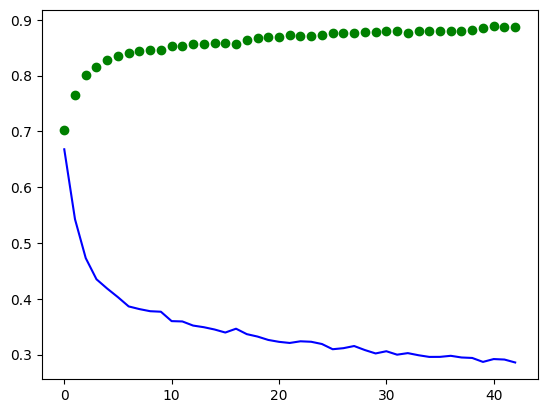

In [13]:
accuracy =history.history['accuracy']
loss = history.history['loss']
epochs=range(len(accuracy))

import matplotlib.pyplot as plt
plt.plot(epochs, accuracy, 'bo', label='Training accuracy', color='green')
plt.plot(epochs,loss , 'b', label ='Training loss')
plt.show()